## Deuflhard Function

In [11]:
using Pkg
Pkg.activate("../../.")
using CairoMakie
CairoMakie.activate!()
# using GLMakie
# GLMakie.activate!()

using Globtim
using DynamicPolynomials, DataFrames
using ProgressLogging

  Activating project at `~/globtim`


In [12]:
# Constants and Parameters
const n, a, b = 2, 7, 5
f = Deuflhard # Objective function

Deuflhard (generic function with 1 method)

In [13]:
d = 8 # Initial Degree 
SMPL = 100 # Number of samples
center = [0.0, 0.0]
TR = test_input(f,
                dim=n,
                center=[0.0, 0.0],
                GN=SMPL,
                sample_range=[1.2, 1.5]
                )
pol_cheb = Constructor(TR, d, basis=:chebyshev)
pol_lege = Constructor(TR, d, basis=:legendre);


current L2-norm: 21.424220743089837
current L2-norm: 15.10801462477852


In [14]:
@polyvar(x[1:n]) # Define polynomial ring 
real_pts_cheb = solve_polynomial_system(
    x, n, d, pol_cheb.coeffs;
    basis=pol_cheb.basis,
    precision=pol_cheb.precision,
    normalized=false,
    power_of_two_denom=pol_cheb.power_of_two_denom
)

real_pts_lege = solve_polynomial_system(
    x, n, d, pol_lege.coeffs;
    basis=pol_lege.basis,
    precision=pol_lege.precision,
    normalized=true)

df_cheb = process_crit_pts(real_pts_cheb, f, TR)
df_lege = process_crit_pts(real_pts_lege, f, TR)

Row,x1,x2,z
,Float64,Float64,Float64
1,0.964884,0.913678,14.2605
2,0.576934,1.12996,10.8937
3,-0.546579,1.14957,4.35653
4,1.05998,0.716852,11.3054
5,-0.499227,0.398524,2.27712
6,0.735304,0.868961,7.18343
7,0.499227,-0.398524,2.27712
8,-2.74365e-17,-1.64467e-15,4.0
9,-0.728276,0.833521,0.205883


In [15]:
using Optim
df_cheb, df_min_cheb = analyze_critical_points(f, df_cheb, TR, tol_dist=0.001)
df_lege, df_min_lege = analyze_critical_points(f, df_lege, TR, tol_dist=0.001);

Processing point 1 of 13
Optimization has converged within bounds: ✓
Processing point 2 of 13
Optimization has converged within bounds: ✓
Processing point 3 of 13
Optimization has converged within bounds: ✓
Processing point 4 of 13
Optimization has converged within bounds: ✓
Processing point 5 of 13
Optimization has converged within bounds: ✓
Processing point 6 of 13
Optimization has converged within bounds: ✓
Processing point 7 of 13
Optimization has converged within bounds: ✓
Processing point 8 of 13
Optimization has converged within bounds: ✓
Processing point 9 of 13
Optimization has converged within bounds: ✓
Processing point 10 of 13
Optimization has converged within bounds: ✓
Processing point 11 of 13
Optimization has converged within bounds: ✓
Processing point 12 of 13
Optimization has converged within bounds: ✓
Processing point 13 of 13
Optimization has converged within bounds: ✓

=== Computing Enhanced Statistics ===
Computing spatial regions...
Clustering function values...
C

In [16]:
# fig_1 = cairo_plot_polyapprox_levelset(pol_cheb, TR, df_cheb, df_min_cheb, chebyshev_levels=true, figure_size=(800, 800))

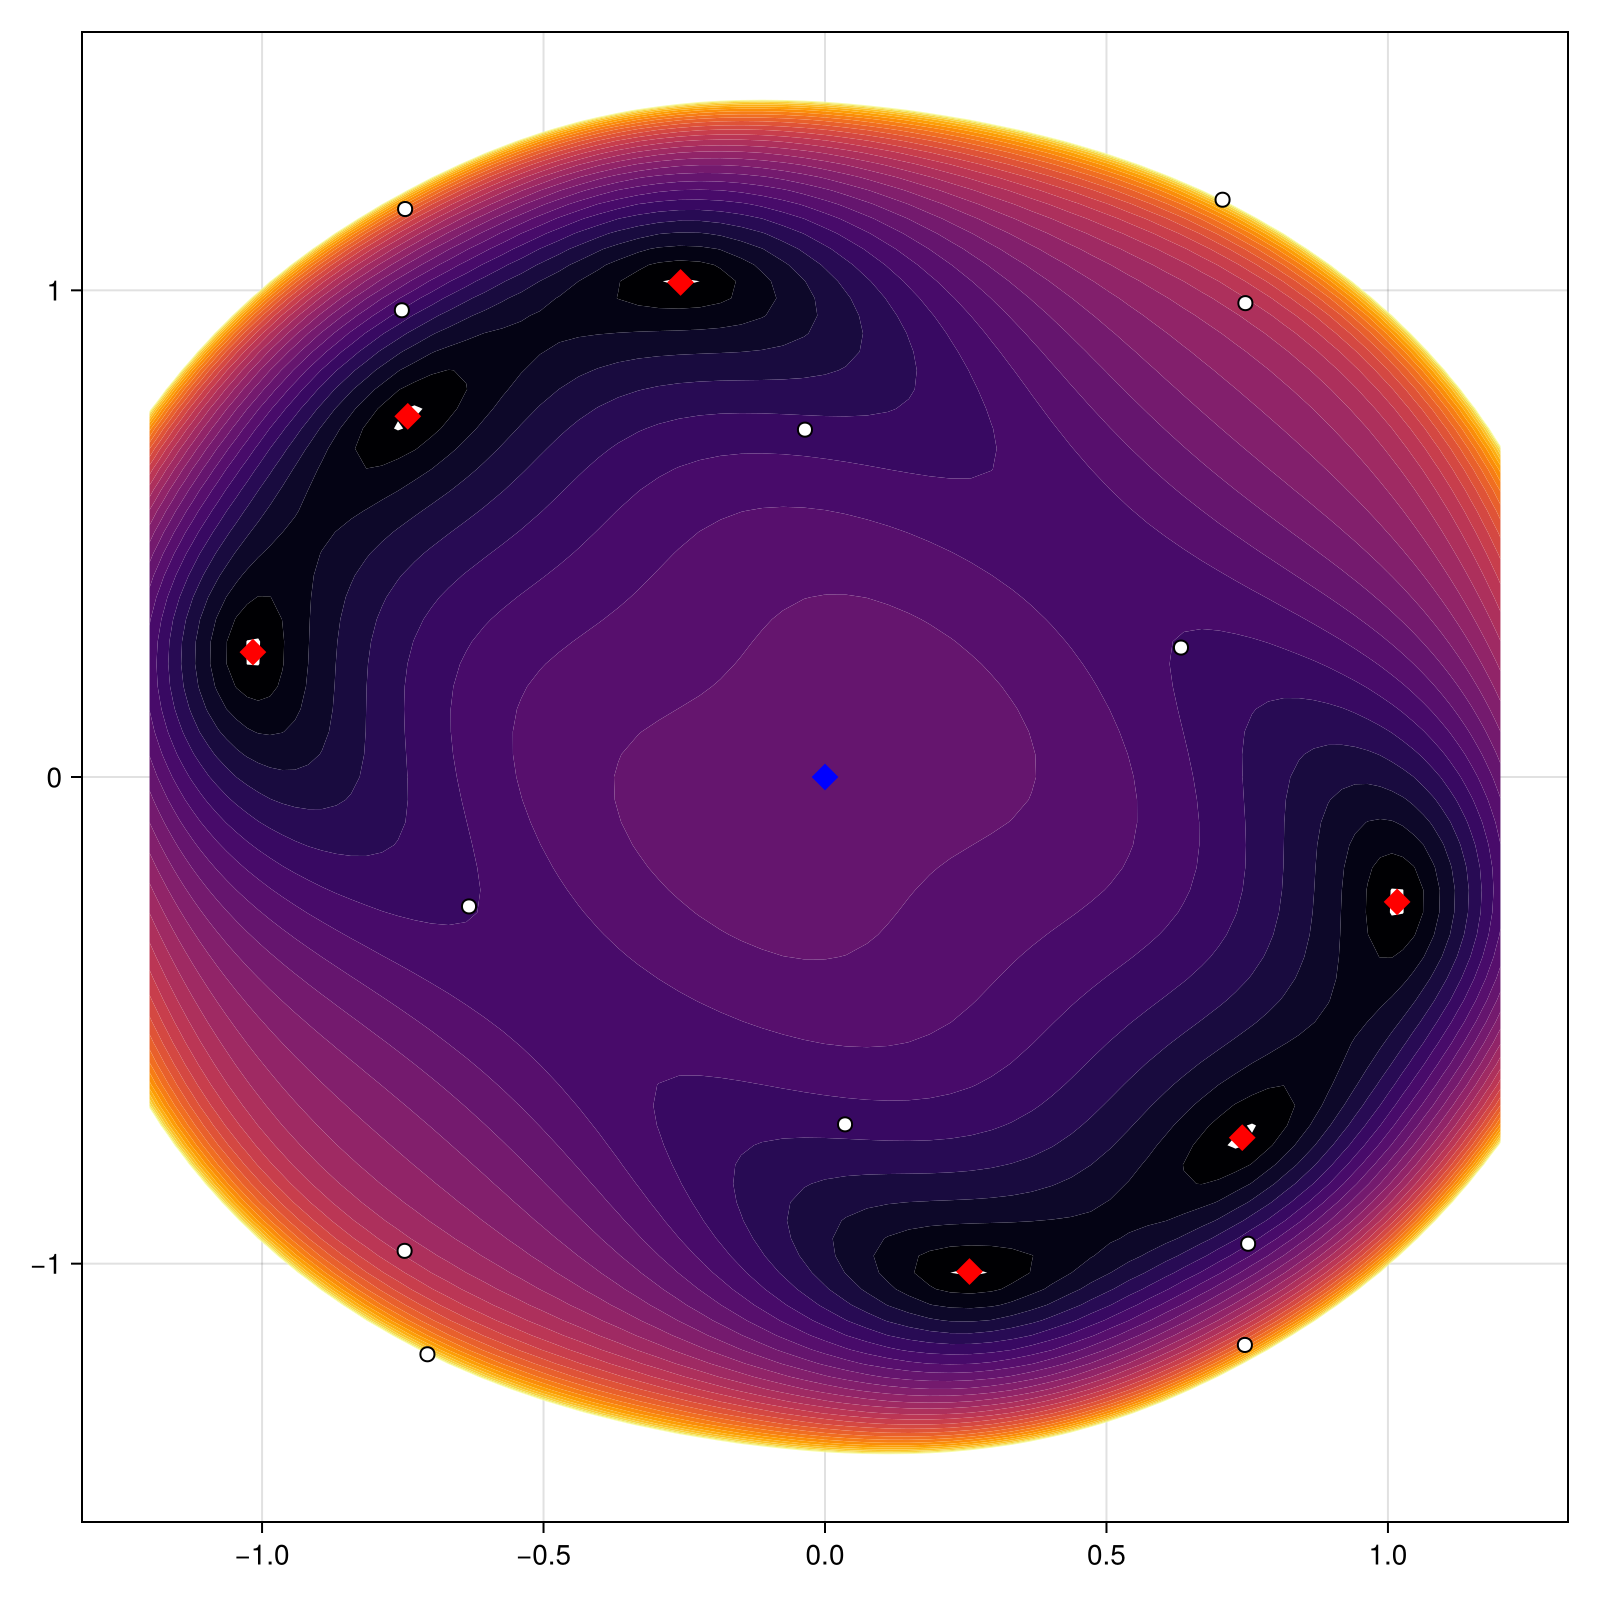

In [17]:
fig_1 = cairo_plot_polyapprox_levelset(pol_cheb, TR, df_cheb, df_min_cheb, chebyshev_levels=true, figure_size=(800, 800))

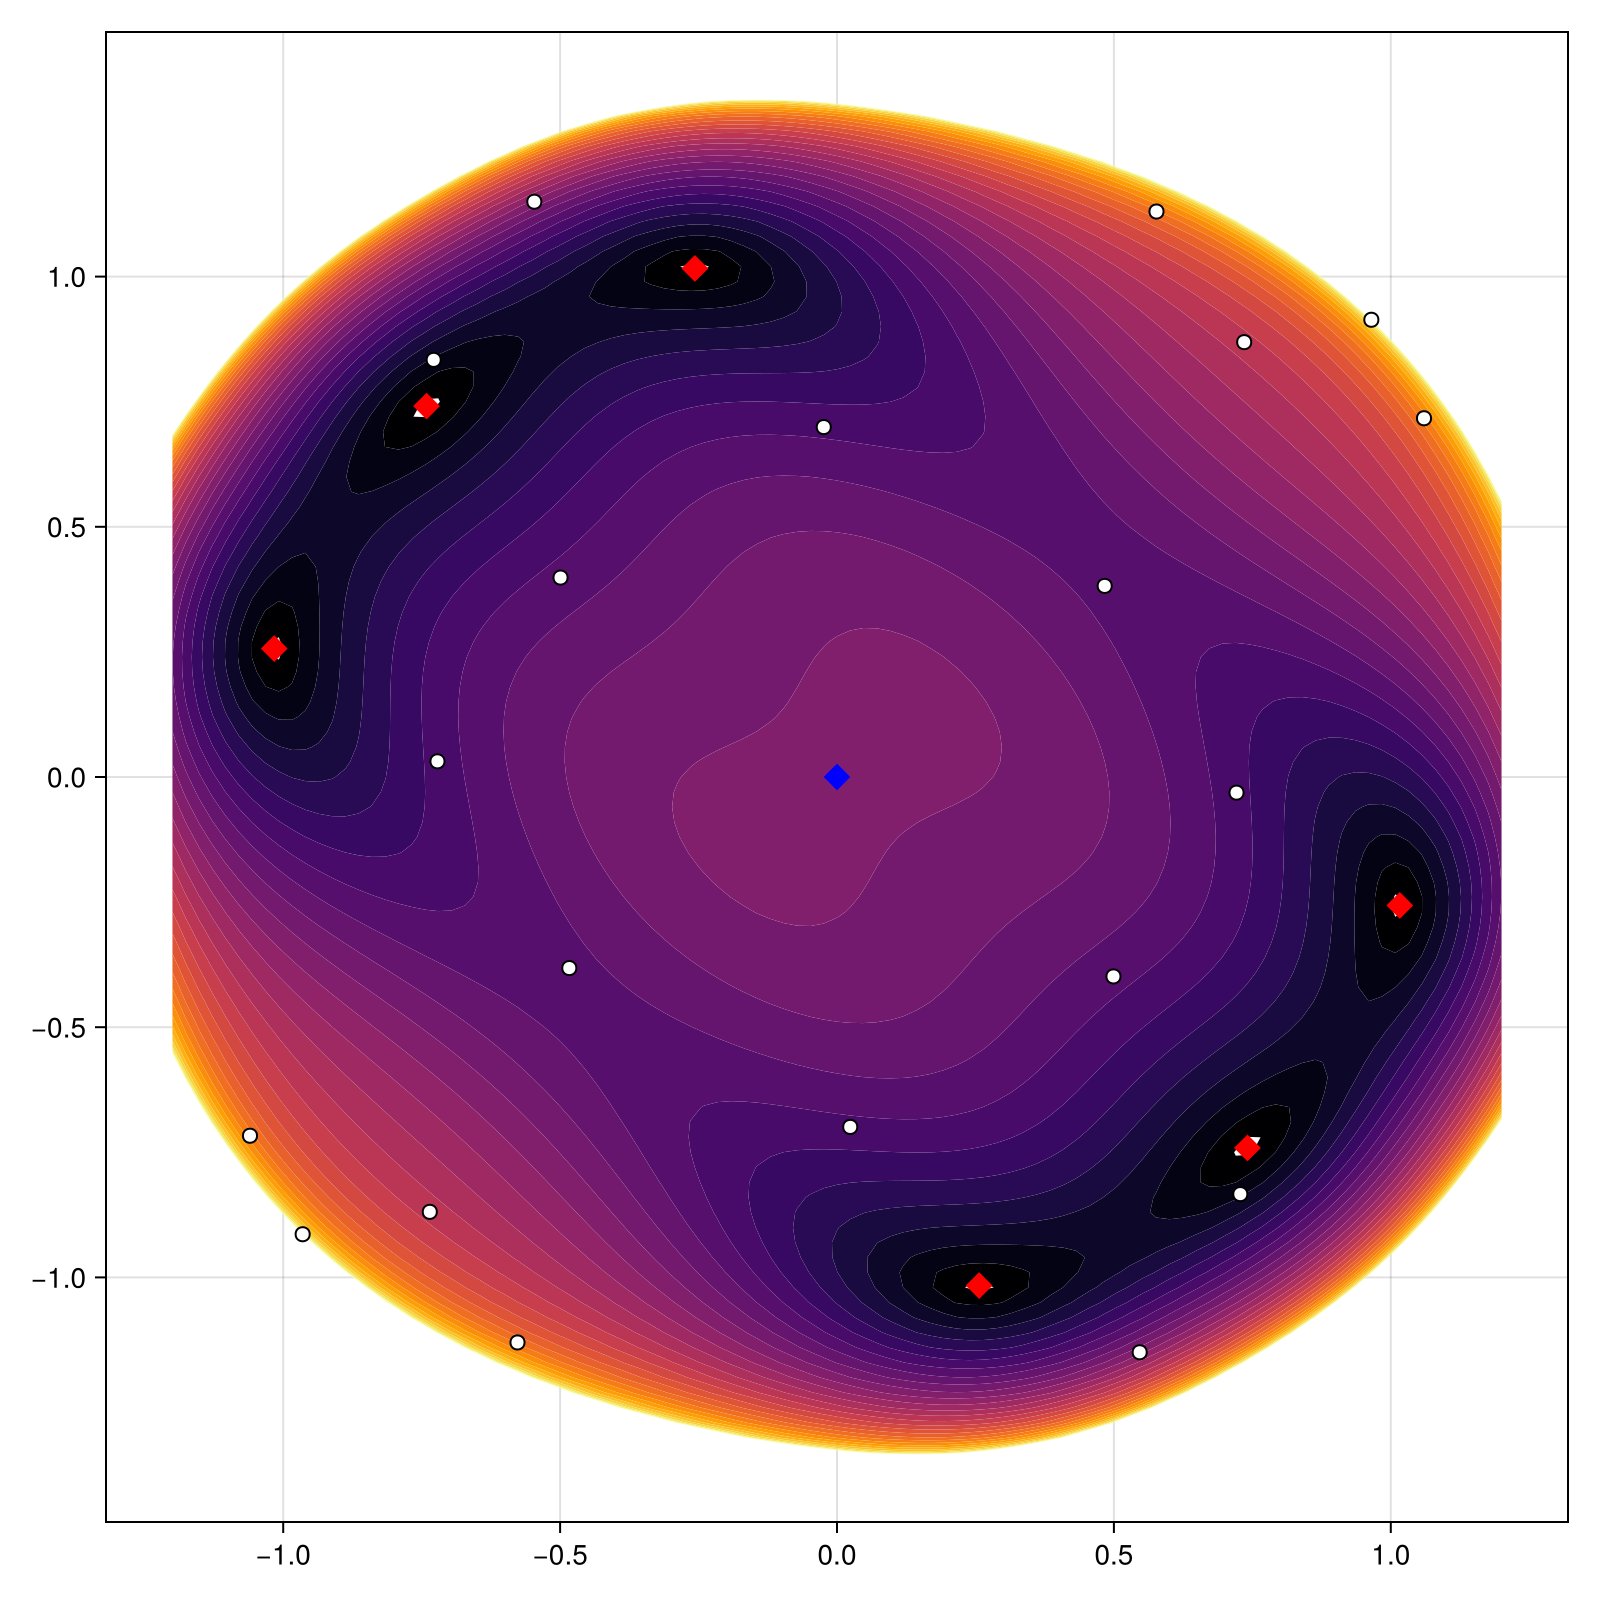

In [18]:
fig_2 = cairo_plot_polyapprox_levelset(pol_lege, TR, df_lege, df_min_lege, chebyshev_levels=true, figure_size = (800, 800))

In [19]:
# Commented out save command
# save("Deuflhard_w_22.pdf", fig_1)

In [20]:
# Commented out save command
# save("deuflhard_cheb_22_3d_1.png", fig_3d)
# GLMakie.closeall()